qubits  50
function  x35 xor x42


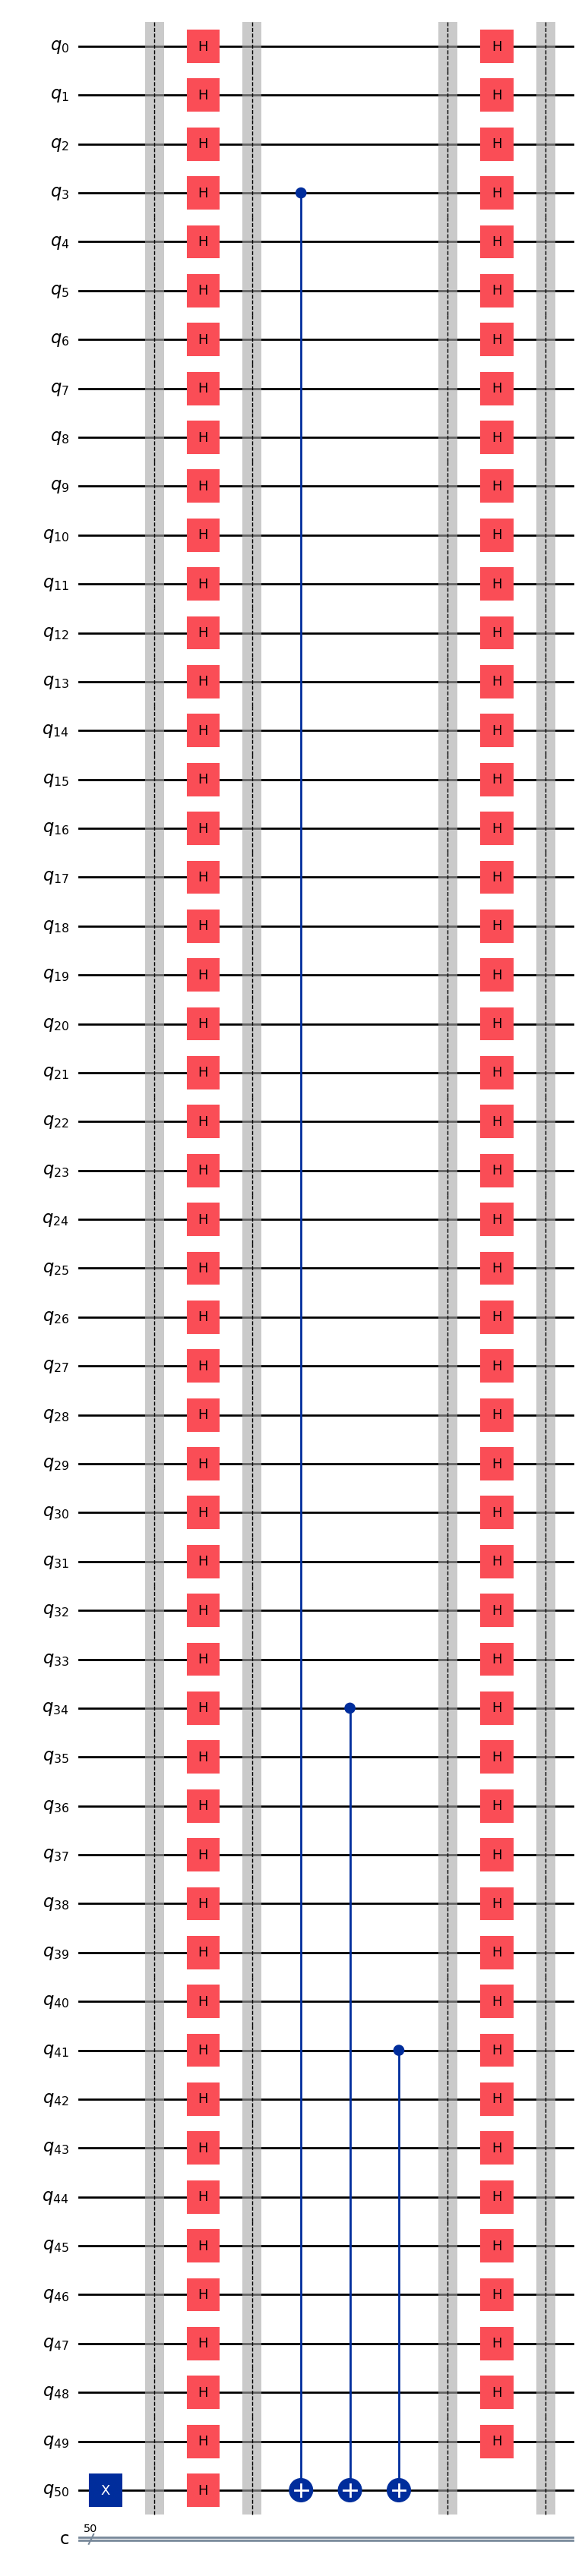

In [ ]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_histogram
from qiskit_aer import Aer

n = int(input("Enter the number of qubits"))
print('qubits ', n)
dj = QuantumCircuit(n+1, n)
func = input("Enter the function:" )
print('function ', func)
dj.x(n)
dj.barrier()
dj.h(range(n+1))
dj.barrier()
# bit_string : "xn-1 xn-2....x1 x0"
def oracle_function(qc : QuantumCircuit, f:str,n):
    if f == '0' or f == '1':
        qc.id(range(0, n))
    bar_pass = 1
    for i in range(n):

        if f.count(f'x{i+1} ') or f.count(f' x{i+1}'):
            if f.count('xor'):
                qc.cx(i, n)
                if f.count(f'bar') and bar_pass:
                    qc.x(i)
                    bar_pass = 0
                continue
            else:
                qc.cx(i, n)
                if f.count(f'bar'):
                    qc.x(i)
                return qc
    return qc    


oracle_function(dj, func, n)

dj.barrier()

dj.h(range(n))
dj.barrier()



dj.draw('mpl')    


In [2]:
state = Statevector(dj)

state.draw('latex')

ValueError: Maximum allowed dimension exceeded

the function is balanced


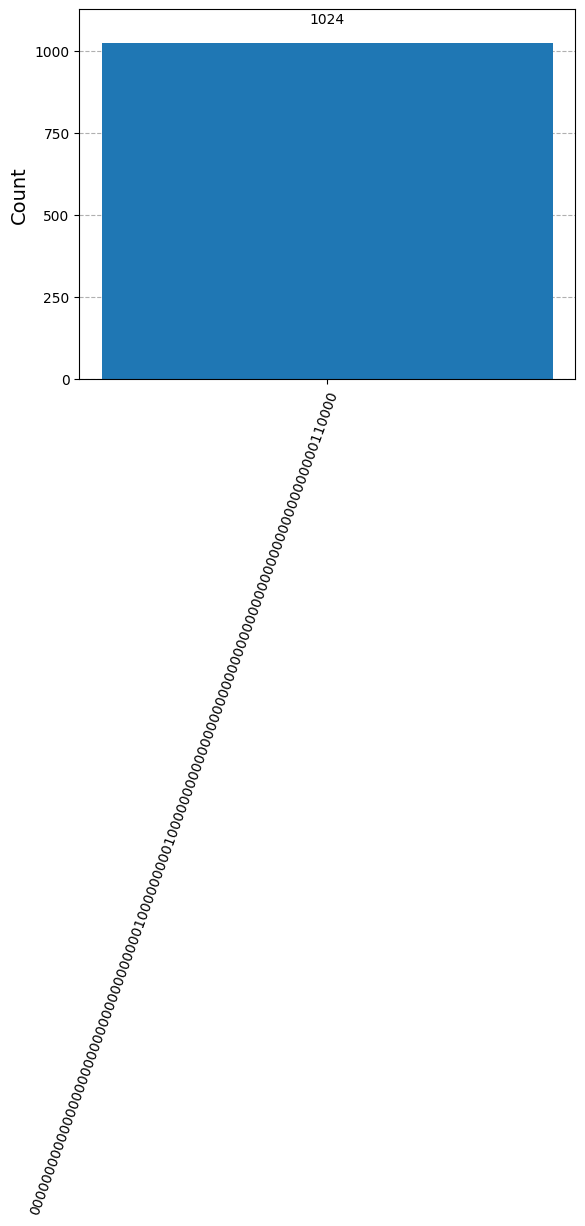

In [3]:
sim = Aer.get_backend('aer_simulator')

dj.measure(range(n), range(n))
results = sim.run(dj).result()
counts = results.get_counts()
outcomes = list(counts.keys())[0]
if outcomes == '0'*n:

    print("the function is constant")
else:
    print("the function is balanced")

plot_histogram(counts)